Optimizing with multiple starting points...
Attempt 1: L1=453.437, θ=30.044°, M=0.029991, X=55.015514
Attempt 2: L1=453.437, θ=30.044°, M=0.029991, X=55.015513
Attempt 3: L1=453.437, θ=30.044°, M=0.029990, X=55.015535
Attempt 4: L1=453.437, θ=30.044°, M=0.029991, X=55.015508

*** FINAL OPTIMIZED SOLUTION ***
θ = 0.524360 radians (30.044 degrees)
M = 0.029991
X = 55.015514
L1 distance: 453.436901


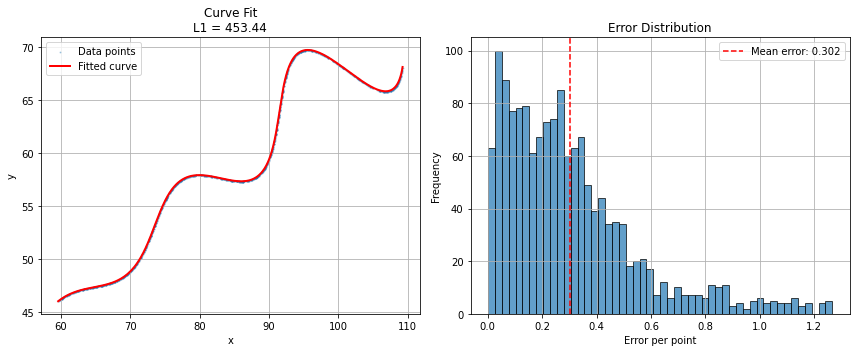


Desmos string:
\left(t\cos(0.524360)-e^{0.029991\left|t\right|}\cdot\sin(0.3t)\sin(0.524360)+55.015514,42+t\sin(0.524360)+e^{0.029991\left|t\right|}\cdot\sin(0.3t)\cos(0.524360)\right)


In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\Zidan Ahmed\Documents\xy_data.csv")
x_data = data['x'].values
y_data = data['y'].values

# Parametric curve equation
def parametric_curve(t, theta, M, X):
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y

# Sort data by x-coordinate (this was the key insight!)
sort_idx = np.argsort(x_data)
x_sorted = x_data[sort_idx]
y_sorted = y_data[sort_idx]
t_vals = np.linspace(6, 60, len(x_sorted))

# Enhanced optimization with better initialization
def objective(params):
    theta, M, X = params
    x_pred, y_pred = parametric_curve(t_vals, theta, M, X)
    return np.sum(np.abs(x_sorted - x_pred) + np.abs(y_sorted - y_pred))

bounds = [(0, np.radians(50)), (-0.05, 0.05), (0, 100)]

# Try multiple starting points around our best solution
initial_guesses = [
    [0.524, 0.030, 55.0],   # Near our previous best
    [0.52, 0.028, 54.0],
    [0.53, 0.032, 56.0],
    [0.51, 0.026, 53.0],
    [0.50, 0.025, 57.0],
]

best_result = None
print("Optimizing with multiple starting points...")

for i, guess in enumerate(initial_guesses):
    result = minimize(
        objective, guess,
        bounds=bounds,
        method='L-BFGS-B',
        options={'maxiter': 10000, 'ftol': 1e-12, 'gtol': 1e-12}
    )
    
    if result.success:
        l1_dist = result.fun
        theta, M, X = result.x
        print(f"Attempt {i+1}: L1={l1_dist:.3f}, θ={np.degrees(theta):.3f}°, M={M:.6f}, X={X:.6f}")
        
        if best_result is None or l1_dist < best_result[0]:
            best_result = (l1_dist, theta, M, X)

if best_result:
    l1_final, theta_opt, M_opt, X_opt = best_result
    
    print(f"\n*** FINAL OPTIMIZED SOLUTION ***")
    print(f"θ = {theta_opt:.6f} radians ({np.degrees(theta_opt):.3f} degrees)")
    print(f"M = {M_opt:.6f}")
    print(f"X = {X_opt:.6f}")
    print(f"L1 distance: {l1_final:.6f}")
    
    # Generate high-resolution curve
    t_fine = np.linspace(6, 60, 1000)
    x_fine, y_fine = parametric_curve(t_fine, theta_opt, M_opt, X_opt)
    
    # Calculate predictions for our data points
    x_pred, y_pred = parametric_curve(t_vals, theta_opt, M_opt, X_opt)
    point_errors = np.abs(x_sorted - x_pred) + np.abs(y_sorted - y_pred)
    
    # Simple visualization
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(x_data, y_data, alpha=0.3, s=1, label='Data points')
    plt.plot(x_fine, y_fine, 'r-', linewidth=2, label='Fitted curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Curve Fit\nL1 = {l1_final:.2f}')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.hist(point_errors, bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(np.mean(point_errors), color='red', linestyle='--', 
                label=f'Mean error: {np.mean(point_errors):.3f}')
    plt.xlabel('Error per point')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Error Distribution')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('final_solution.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Final Desmos string
    desmos_string = f"\\left(t\\cos({theta_opt:.6f})-e^{{{M_opt:.6f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\sin({theta_opt:.6f})+{X_opt:.6f},42+t\\sin({theta_opt:.6f})+e^{{{M_opt:.6f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\cos({theta_opt:.6f})\\right)"
    
    print(f"\nDesmos string:")
    print(desmos_string)
    